<a href="https://colab.research.google.com/github/mohsenSarvariHero/PythonFirst/blob/main/Q10_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

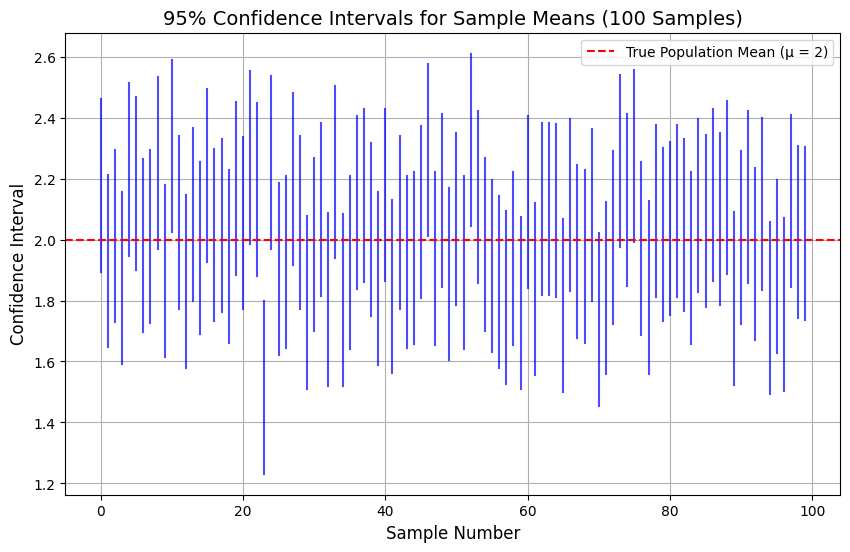

array([[1.89415064, 2.4599539 ],
       [1.64680096, 2.21260422],
       [1.728226  , 2.29402926],
       [1.59109738, 2.15690064],
       [1.946195  , 2.51199826]])

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
population_mean = 2      # Population mean (μ)
population_std = 0.5     # Population standard deviation (σ)
sample_size = 12         # Sample size (n)
num_samples = 100        # Number of samples to draw

# Confidence level
z_score = 1.96           # z-score for 95% confidence level

# Function to generate a sample and compute the confidence interval
def calculate_confidence_interval():
    # Random sample from the population (normal distribution)
    sample = np.random.normal(population_mean, population_std, sample_size)

    # Calculate sample mean
    sample_mean = np.mean(sample)

    # Calculate standard error of the mean
    standard_error = population_std / np.sqrt(sample_size)

    # Calculate the margin of error
    margin_of_error = z_score * standard_error

    # Calculate the confidence interval
    ci_lower = sample_mean - margin_of_error
    ci_upper = sample_mean + margin_of_error

    return ci_lower, ci_upper, sample_mean

# Store the confidence intervals and sample means
conf_intervals = []
sample_means = []

# Repeat the process 100 times
for _ in range(num_samples):
    ci_lower, ci_upper, sample_mean = calculate_confidence_interval()
    conf_intervals.append((ci_lower, ci_upper))
    sample_means.append(sample_mean)

# Convert to numpy arrays for easier plotting
conf_intervals = np.array(conf_intervals)
sample_means = np.array(sample_means)

# Plot the confidence intervals
plt.figure(figsize=(10, 6))
for i in range(num_samples):
    plt.plot([i, i], [conf_intervals[i, 0], conf_intervals[i, 1]], color='blue', alpha=0.7)

# Plot the true population mean
plt.axhline(population_mean, color='red', linestyle='--', label="True Population Mean (μ = 2)")

# Add labels and title
plt.title('95% Confidence Intervals for Sample Means (100 Samples)', fontsize=14)
plt.xlabel('Sample Number', fontsize=12)
plt.ylabel('Confidence Interval', fontsize=12)
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

# Display the first few confidence intervals for reference
conf_intervals[:5]  # Show first 5 intervals for brevity
